In [1]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [2]:
df= pd.DataFrame()

In [3]:
df['x1']= [1,2,3,4,5,6,6,7,9,9]
df['x2']= [5,3,6,8,1,9,5,8,9,2]
df['label']= [1,1,0,1,0,1,0,1,0,0]

In [4]:
df

,x1,x2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='x1', ylabel='x2'>

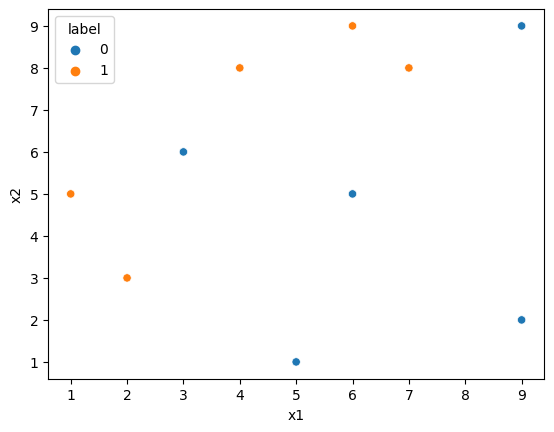

In [7]:
import seaborn as sns
sns.scatterplot(x=df['x1'],y=df['x2'],hue=df['label'])

In [8]:
#Assigning weight at the start all the points have equal weights
df['weights']= 1/df.shape[0]

In [13]:
from sklearn.tree import DecisionTreeClassifier
dc= DecisionTreeClassifier(max_depth=1)

In [11]:
X= df.iloc[:,0:2].values
y= df.iloc[:,2].values

In [14]:
dc.fit(X,y)

DecisionTreeClassifier(max_depth=1)

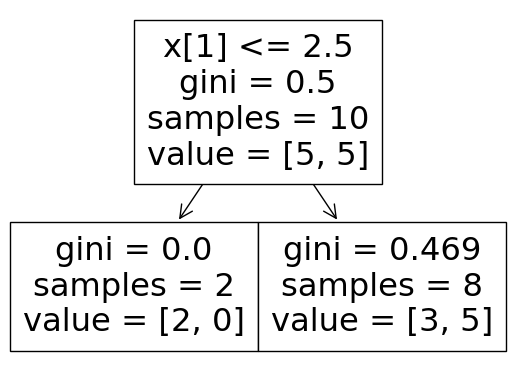

In [17]:
from sklearn.tree import plot_tree
plot_tree(dc);

<Axes: >

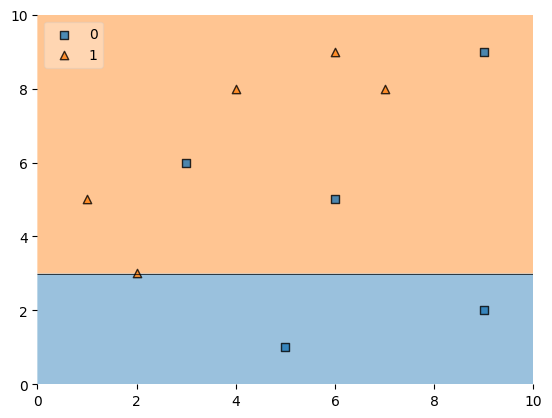

In [20]:
plot_decision_regions(X,y,clf= dc,legend= 2)

In [21]:
df['y_pred']= dc.predict(X)

In [22]:
df

,x1,x2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


In [23]:
def cal_model_weight(error):
    
    return 0.5*np.log((1-error)/(error))

In [24]:
alpha= cal_model_weight(0.3)
alpha

0.42364893019360184

In [25]:
def update_row_weights(row,alpha=0.423):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

In [26]:
df['updated_weights']= df.apply(update_row_weights, axis=1)

In [27]:
df

,x1,x2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,1,0.152653
3,4,8,1,0.1,1,0.065508
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,1,0.065508
6,6,5,0,0.1,1,0.152653
7,7,8,1,0.1,1,0.065508
8,9,9,0,0.1,1,0.152653
9,9,2,0,0.1,0,0.065508


In [28]:
df['updated_weights'].sum()

0.9165153319682015

In [29]:

df['nomalized_weights'] = df['updated_weights']/df['updated_weights'].sum()

In [30]:
df

,x1,x2,label,weights,y_pred,updated_weights,nomalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,1,0.152653,0.166559
3,4,8,1,0.1,1,0.065508,0.071475
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,1,0.065508,0.071475
6,6,5,0,0.1,1,0.152653,0.166559
7,7,8,1,0.1,1,0.065508,0.071475
8,9,9,0,0.1,1,0.152653,0.166559
9,9,2,0,0.1,0,0.065508,0.071475


In [31]:
df['nomalized_weights'].sum()

1.0

In [32]:
df['cumsum_upper'] = np.cumsum(df['nomalized_weights'])

In [33]:
df['cumsum_lower'] = df['cumsum_upper'] - df['nomalized_weights']

In [35]:
df[['x1','x2','label','weights','y_pred','updated_weights','cumsum_lower','cumsum_upper']]

,x1,x2,label,weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.142950
2,3,6,0,0.1,1,0.152653,0.142950,0.309508
3,4,8,1,0.1,1,0.065508,0.309508,0.380983
4,5,1,0,0.1,0,0.065508,0.380983,0.452458
5,6,9,1,0.1,1,0.065508,0.452458,0.523933
6,6,5,0,0.1,1,0.152653,0.523933,0.690492
7,7,8,1,0.1,1,0.065508,0.690492,0.761967
8,9,9,0,0.1,1,0.152653,0.761967,0.928525
9,9,2,0,0.1,0,0.065508,0.928525,1.000000


In [36]:
def create_new_dataset(df):

  indices = []

  for i in range(df.shape[0]):
    a = np.random.random()
    for index,row in df.iterrows():
      if row['cumsum_upper'] > a and a > row['cumsum_lower']:
        indices.append(index)
  return indices


In [37]:

index_values = create_new_dataset(df)

index_values

[6, 2, 6, 3, 8, 8, 1, 6, 4, 3]

In [38]:
second_df = df.iloc[index_values,[0,1,2,3]]

In [39]:
second_df

,x1,x2,label,weights
6,6,5,0,0.1
2,3,6,0,0.1
6,6,5,0,0.1
3,4,8,1,0.1
8,9,9,0,0.1
8,9,9,0,0.1
1,2,3,1,0.1
6,6,5,0,0.1
4,5,1,0,0.1
3,4,8,1,0.1


In [40]:
dt2 = DecisionTreeClassifier(max_depth=1)

In [41]:
X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

In [42]:
dt2.fit(X,y)     

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 4.5\ngini = 0.42\nsamples = 10\nvalue = [7, 3]'),
 Text(0.25, 0.25, 'gini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]')]

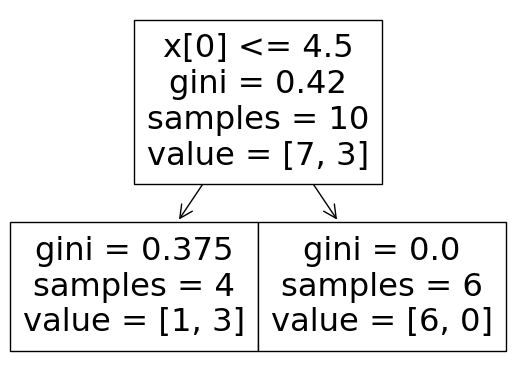

In [43]:
plot_tree(dt2)

<Axes: >

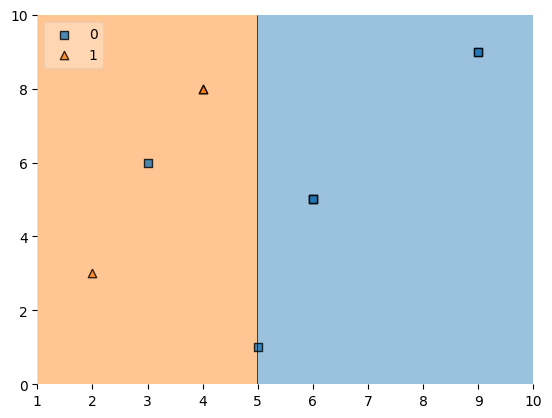

In [44]:
plot_decision_regions(X, y, clf=dt2, legend=2)

In [45]:
second_df['y_pred'] = dt2.predict(X)

In [46]:
second_df

,x1,x2,label,weights,y_pred
6,6,5,0,0.1,0
2,3,6,0,0.1,1
6,6,5,0,0.1,0
3,4,8,1,0.1,1
8,9,9,0,0.1,0
8,9,9,0,0.1,0
1,2,3,1,0.1,1
6,6,5,0,0.1,0
4,5,1,0,0.1,0
3,4,8,1,0.1,1


In [48]:
alpha2 = cal_model_weight(0.1)

In [49]:
alpha2

1.0986122886681098

In [50]:
def update_row_weights(row,alpha=1.09):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

In [51]:
second_df['updated_weights'] = second_df.apply(update_row_weights,axis=1)

In [52]:
second_df

,x1,x2,label,weights,y_pred,updated_weights
6,6,5,0,0.1,0,0.033622
2,3,6,0,0.1,1,0.297427
6,6,5,0,0.1,0,0.033622
3,4,8,1,0.1,1,0.033622
8,9,9,0,0.1,0,0.033622
8,9,9,0,0.1,0,0.033622
1,2,3,1,0.1,1,0.033622
6,6,5,0,0.1,0,0.033622
4,5,1,0,0.1,0,0.033622
3,4,8,1,0.1,1,0.033622


In [53]:
second_df['nomalized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()

In [54]:
second_df

,x1,x2,label,weights,y_pred,updated_weights,nomalized_weights
6,6,5,0,0.1,0,0.033622,0.056034
2,3,6,0,0.1,1,0.297427,0.495694
6,6,5,0,0.1,0,0.033622,0.056034
3,4,8,1,0.1,1,0.033622,0.056034
8,9,9,0,0.1,0,0.033622,0.056034
8,9,9,0,0.1,0,0.033622,0.056034
1,2,3,1,0.1,1,0.033622,0.056034
6,6,5,0,0.1,0,0.033622,0.056034
4,5,1,0,0.1,0,0.033622,0.056034
3,4,8,1,0.1,1,0.033622,0.056034


In [55]:
second_df['nomalized_weights'].sum()

0.9999999999999999

In [56]:
second_df['cumsum_upper'] = np.cumsum(second_df['nomalized_weights'])

In [57]:
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['nomalized_weights']

In [59]:
second_df[['x1','x2','label','weights','y_pred','nomalized_weights','cumsum_lower','cumsum_upper']]

,x1,x2,label,weights,y_pred,nomalized_weights,cumsum_lower,cumsum_upper
6,6,5,0,0.1,0,0.056034,0.000000,0.056034
2,3,6,0,0.1,1,0.495694,0.056034,0.551728
6,6,5,0,0.1,0,0.056034,0.551728,0.607762
3,4,8,1,0.1,1,0.056034,0.607762,0.663796
8,9,9,0,0.1,0,0.056034,0.663796,0.719830
8,9,9,0,0.1,0,0.056034,0.719830,0.775864
1,2,3,1,0.1,1,0.056034,0.775864,0.831898
6,6,5,0,0.1,0,0.056034,0.831898,0.887932
4,5,1,0,0.1,0,0.056034,0.887932,0.943966
3,4,8,1,0.1,1,0.056034,0.943966,1.000000


In [60]:
index_values = create_new_dataset(second_df)

In [61]:
third_df = second_df.iloc[index_values,[0,1,2,3]]

In [62]:
third_df

,x1,x2,label,weights
6,6,5,0,0.1
6,6,5,0,0.1
4,5,1,0,0.1
6,6,5,0,0.1
2,3,6,0,0.1
6,6,5,0,0.1
8,9,9,0,0.1
1,2,3,1,0.1
6,6,5,0,0.1
6,6,5,0,0.1


In [63]:
dt3 = DecisionTreeClassifier(max_depth=1)

X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

dt3.fit(X,y)

DecisionTreeClassifier(max_depth=1)

<Axes: >

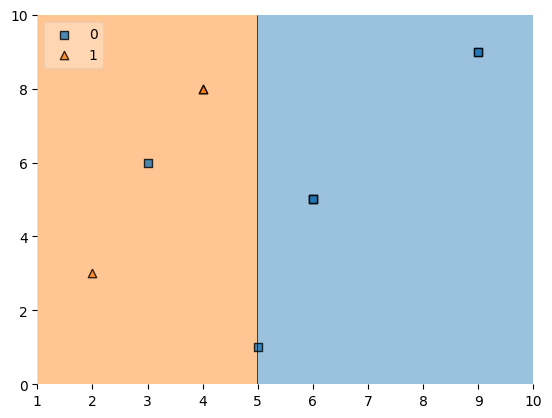

In [64]:
plot_decision_regions(X, y, clf=dt3, legend=2)

In [65]:
third_df['y_pred'] = dt3.predict(X)

In [66]:
third_df

,x1,x2,label,weights,y_pred
6,6,5,0,0.1,0
6,6,5,0,0.1,1
4,5,1,0,0.1,0
6,6,5,0,0.1,1
2,3,6,0,0.1,0
6,6,5,0,0.1,0
8,9,9,0,0.1,1
1,2,3,1,0.1,0
6,6,5,0,0.1,0
6,6,5,0,0.1,1


In [68]:
alpha3 = cal_model_weight(0.7)
alpha3

-0.4236489301936017

In [70]:
print(alpha,alpha2,alpha3)

0.42364893019360184 1.0986122886681098 -0.4236489301936017


In [72]:
query = np.array([1,5]).reshape(1,2)
dc.predict(query)

array([1], dtype=int64)

In [73]:
dt2.predict(query)

array([1], dtype=int64)

In [74]:
dt3.predict(query)

array([1], dtype=int64)

In [76]:
alpha*1 + alpha2*(1) + alpha3*(1)

1.09861228866811

In [77]:
np.sign(1.09)  # fot x<0 revert -1 for x=0 revert 0 and x>0 revert 1

1.0

In [79]:
query = np.array([9,9]).reshape(1,2)
dc.predict(query)

array([1], dtype=int64)

In [80]:
dt2.predict(query)

array([0], dtype=int64)

In [81]:
dt3.predict(query)

array([0], dtype=int64)

In [83]:
alpha*(1) + alpha2*(-1) + alpha3*(-1)

-0.2513144282809062

In [84]:
np.sign(-0.25)

-1.0